In [1]:
import nltk

# 말뭉치 가져오기

In [2]:
nltk.download('book', quiet=True)
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [3]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [4]:
emma_raw = nltk.corpus.gutenberg.raw('austen-emma.txt')
emma_raw[:1000]

"[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.\n\nShe was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period.  Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.\n\nSixteen years had Miss Taylor been in Mr. Woodhouse's family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.  Between _them_ it was more the intimacy\nof sisters.  Even before Miss Taylor had ceased to hold the nominal\noffice of 

# 토큰 생성
- 자연어 문서에서 분석을 위해 긴 문자열을 작은 단위로 나누는 것
- 문장 단위, 단어단위, 정규표현식으로 나눌 수 있음

In [5]:
#문장단위 - 토큰 생성
from nltk.tokenize import sent_tokenize
print(sent_tokenize(emma_raw[:10000])[1])

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.


In [6]:
from nltk.tokenize import word_tokenize
print(word_tokenize(emma_raw[50:100]))

['Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a']


In [7]:
from nltk.tokenize import RegexpTokenizer
retTokenize = RegexpTokenizer("[\w]+")
retTokenize.tokenize(emma_raw[50:100])

['Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a']

# 형태소 분석
- 형태소 : 언어학에서 일정한 의미가 있는 가장 작은 말의 단위
- 보통 자연어 처리에서 토큰으로 형태소를 이용
- 형태소 분석 : 단어로부터 야근, 접두사, 접미사, 품사 등 다양한 언어적 속성을 파악하고
이를 이용하여 형태소를 찾아내거나 처리하는 작업
- 형태소 분석의 예
    - 어간 추출
    - 원형 복원
    - 품사 부착

# 어간
- PorterStemmer, lancasterStremmer 제공
- 어간추출은 단순히 어미만 제거함

In [8]:
from nltk.stem import PorterStemmer, LancasterStemmer

st1 = PorterStemmer()
st2 = LancasterStemmer()

words = ['fly', 'flies', 'flying', 'flew', 'flown']
print('Porter stemmer: ', [st1.stem(w) for w in words])
print('LancasterStemmer: ', [st2.stem(w) for w in words])

Porter stemmer:  ['fli', 'fli', 'fli', 'flew', 'flown']
LancasterStemmer:  ['fly', 'fli', 'fly', 'flew', 'flown']


In [9]:
list1 = []
for w in words:
    list1.append(st1.stem(w))
print(list1)

list2 = [st1.stem(w) for w in words]
print(list2)

['fli', 'fli', 'fli', 'flew', 'flown']
['fli', 'fli', 'fli', 'flew', 'flown']


# 원형복원
- 같은 의미를 가지는 여러 단어를 사전형으로 통일하는 작업

In [10]:
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\it\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [11]:
Im = WordNetLemmatizer()
[Im.lemmatize(w, 'v') for w in words]

['fly', 'fly', 'fly', 'fly', 'fly']

# 품사부착
- 품사는 낱말을 문접적인 기능이나 형태, 뜻에 따라 구분한 것
- 품사의 예
    - NNP : 단순고유명사
    - VB : 동사
    - VBP : 동사현재형
    - NN : 명사
    - DT : 관형사

In [12]:
from nltk.tag import pos_tag
sentence = 'Emma refused to permit us to obtain the refuse permit'
tagged_list = pos_tag(word_tokenize(sentence))
tagged_list

[('Emma', 'NNP'),
 ('refused', 'VBD'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [13]:
noun_list = [t[0] for t in tagged_list if t[1] == 'NN']
noun_list

['refuse', 'permit']

In [14]:
noun_list1 = [t[0] if t[1]=='NN' else 'NOT NN' for t in tagged_list]
noun_list1

['NOT NN',
 'NOT NN',
 'NOT NN',
 'NOT NN',
 'NOT NN',
 'NOT NN',
 'NOT NN',
 'NOT NN',
 'refuse',
 'permit']

In [15]:
list1 = []
for t in tagged_list:
    if t[1] == "NN":
        list1.append(t[0])
    else : 
        list1.append('NOT NN')

list1

['NOT NN',
 'NOT NN',
 'NOT NN',
 'NOT NN',
 'NOT NN',
 'NOT NN',
 'NOT NN',
 'NOT NN',
 'refuse',
 'permit']

In [16]:
from nltk.tag import untag
untag_list = untag(tagged_list)
untag_list

['Emma',
 'refused',
 'to',
 'permit',
 'us',
 'to',
 'obtain',
 'the',
 'refuse',
 'permit']

In [17]:


emma_list = pos_tag(word_tokenize(emma_raw[:2000]))
untag_emma = untag(emma_list)
untag_emma

['[',
 'Emma',
 'by',
 'Jane',
 'Austen',
 '1816',
 ']',
 'VOLUME',
 'I',
 'CHAPTER',
 'I',
 'Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 ',',
 'seemed',
 'to',
 'unite',
 'some',
 'of',
 'the',
 'best',
 'blessings',
 'of',
 'existence',
 ';',
 'and',
 'had',
 'lived',
 'nearly',
 'twenty-one',
 'years',
 'in',
 'the',
 'world',
 'with',
 'very',
 'little',
 'to',
 'distress',
 'or',
 'vex',
 'her',
 '.',
 'She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'s",
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.',
 'Her',
 'mother',
 'had',
 'died',
 'too',
 'long',
 'ago',
 'for',
 'her',
 'to',
 'have',
 'more',
 'than',
 'an',
 'indistin

In [18]:
from nltk import Text
text = Text(retTokenize.tokenize(emma_raw))
print(text)

<Text: Emma by Jane Austen 1816 VOLUME I CHAPTER...>


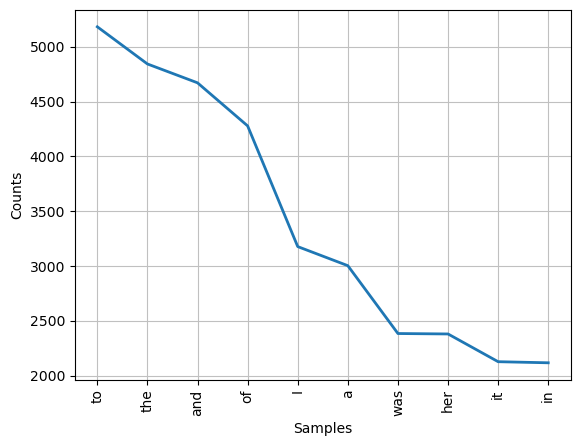

In [19]:
import matplotlib.pyplot as plt
text.plot(10)
plt.show()

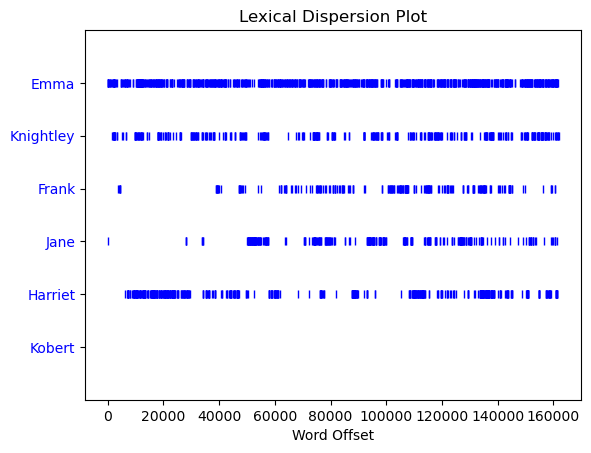

In [20]:
text.dispersion_plot(['Emma', 'Knightley', 'Frank', 'Jane', 'Harriet', 'Kobert'])

In [21]:
text.concordance('Emma')

Displaying 25 of 865 matches:
 Emma by Jane Austen 1816 VOLUME I CHAPTER
 Jane Austen 1816 VOLUME I CHAPTER I Emma Woodhouse handsome clever and rich w
f both daughters but particularly of Emma Between _them_ it was more the intim
nd friend very mutually attached and Emma doing just what she liked highly est
 by her own The real evils indeed of Emma s situation were the power of having
ding day of this beloved friend that Emma first sat in mournful thought of any
going only half a mile from them but Emma was aware that great must be the dif
a day It was a melancholy change and Emma could not but sigh over it and wish 
ll the rest of her life at Hartfield Emma smiled and chatted as cheerfully as 
l be able to tell her how we all are Emma spared no exertions to maintain this
or I have a great regard for you and Emma but when it comes to the question of
a fanciful troublesome creature said Emma playfully That is what you have in y
e few people who could see faults in Emma Woodhouse and th

In [22]:
text.similar('Emma')

she it he i harriet you her jane him that me and all they them herself
there but be isabella


In [23]:
text.common_contexts('Emma', 'she')

No common contexts were found


In [24]:
fd = text.vocab()
type(fd)

nltk.probability.FreqDist

In [25]:
from nltk import FreqDist
stopwords=['Mr.', 'Mrs.', 'Miss', 'Mr', 'Mrs','Dear']
emma_token = pos_tag(retTokenize.tokenize(emma_raw))
# emma_token
name_list = [t[0] for t in emma_token if t[1] == 'NNP' and t[0] not in stopwords]


In [26]:
fd_name = FreqDist(name_list)
fd_name

FreqDist({'Emma': 830, 'Harriet': 491, 'Weston': 439, 'Knightley': 389, 'Elton': 385, 'Woodhouse': 304, 'Jane': 299, 'Fairfax': 241, 'Churchill': 223, 'Frank': 208, ...})

In [27]:
print(fd_name.N())
print(fd_name['Emma'])
print(fd_name.freq('Emma'))

7863
830
0.10555767518758744


In [28]:
fd_name.most_common(10)

[('Emma', 830),
 ('Harriet', 491),
 ('Weston', 439),
 ('Knightley', 389),
 ('Elton', 385),
 ('Woodhouse', 304),
 ('Jane', 299),
 ('Fairfax', 241),
 ('Churchill', 223),
 ('Frank', 208)]

In [29]:
from wordcloud import WordCloud
from PIL import Image
import numpy as np

In [30]:
im = Image.open('data/dog.png')
mask_arr = np.array(im)

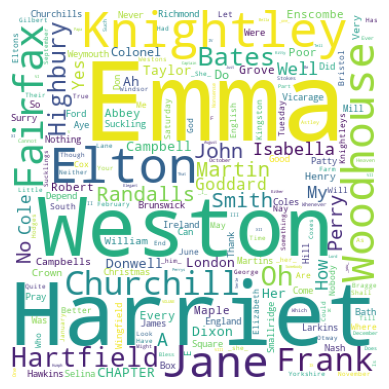

In [31]:
wc = WordCloud(width=1000, height=1000, background_color='white', mask=mask_arr, random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_name))
plt.axis('off')
plt.savefig('data/wc.png')
plt.show()

In [32]:
from konlpy.tag import *
Hannanum = Hannanum()
import konlpy
konlpy.__version__


'0.6.0'

In [33]:
from konlpy.corpus import kolaw
kolaw.fileids

<bound method CorpusLoader.fileids of <konlpy.corpus.CorpusLoader object at 0x000002AB97AB1900>>

In [34]:
c = kolaw.open('constitution.txt').read()
print(c[:50])

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임


In [35]:
from konlpy.corpus import kobill
kobill.fileids()

['1809890.txt',
 '1809891.txt',
 '1809892.txt',
 '1809893.txt',
 '1809894.txt',
 '1809895.txt',
 '1809896.txt',
 '1809897.txt',
 '1809898.txt',
 '1809899.txt']

In [36]:
d = kobill.open('1809890.txt').read()
print(d[:100])

지방공무원법 일부개정법률안

(정의화의원 대표발의 )

 의 안
 번 호

9890

발의연월일 : 2010.  11.  12.  

발  의  자 : 정의화․이명수․김을동 

이


# 형태소 분석 
- konlpy의 형태소 분석, 태깅 라이브러리
    - Hannanum : 한나눔, KAIST Semantic Web Research Center 개발
    - KoNLPy는 다양한 형태소 분석, 태깅 라이브러리를 파이썬에서 쉽게 사용할 수 있도록 모아놓았다.
- Hannanum: 한나눔. KAIST Semantic Web Research Center 개발. -http://semanticweb.kaist.ac.kr/hannanum/
    - Kkma: 꼬꼬마. 서울대학교 IDS(Intelligent Data Systems) 연구실 개발.
    - http://kkma.snu.ac.kr/
    - Komoran: 코모란. Shineware에서 개발.
    - https://github.com/shin285/KOMORAN
    - Open Korean Text: 오픈 소스 한국어 분석기. 과거 트위터 형태소 분석기.
    - https://github.com/open-korean-text/open-korean-text
    - 여기에서는 한나눔, 꼬꼬마, 오픈코리안텍스트 형태소만 예제로 포함하였다


In [37]:
from konlpy.tag import *
hannanum = Hannanum()
kkma = Kkma()
komoran = Komoran()
okt = Okt()

- 형태소 분석기 공통적 기능
    - nouns: 명사 추출
    - morphs: 형태소 추출
    - pos: 형태소 분석과 품사태깅

In [38]:
hannanum.nouns(c[:50])

['대한민국헌법', '유구', '역사', '전통', '빛', '우리', '대한국민', '3·1운동', '건립', '대한민국임']

In [39]:
kkma.nouns(c[:50])

['대한',
 '대한민국',
 '대한민국헌법',
 '민국',
 '헌법',
 '유구',
 '역사',
 '전통',
 '우리',
 '국민',
 '3',
 '1',
 '1운동',
 '운동',
 '건립',
 '대한민국임',
 '임']

In [40]:
komoran.nouns(c[:50])

['대한민국', '헌법', '역사', '전통', '국민', '운동', '건립', '대한민국', '임']

In [41]:
s='텍스트 분석은 어려워요 ㅋㅋㅋ'
okt.pos(s)

[('텍스트', 'Noun'),
 ('분석', 'Noun'),
 ('은', 'Josa'),
 ('어려워요', 'Adjective'),
 ('ㅋㅋㅋ', 'KoreanParticle')]

In [42]:
okt.morphs(s)

['텍스트', '분석', '은', '어려워요', 'ㅋㅋㅋ']

In [43]:
from nltk import Text
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_path = 'c:/Windows/fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

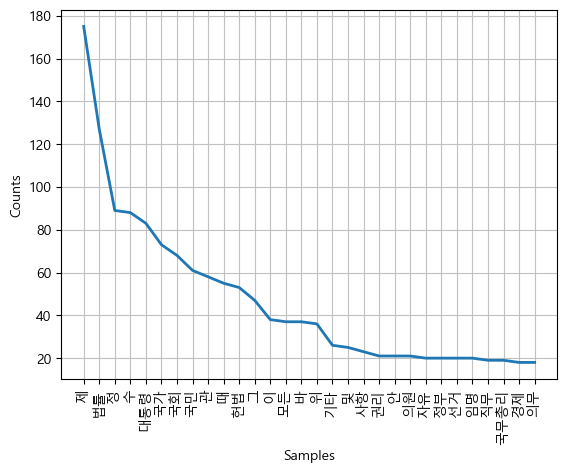

<Axes: xlabel='Samples', ylabel='Counts'>

In [44]:
kolaw = Text(okt.nouns(c), name='kolaw')
kolaw.plot(30)

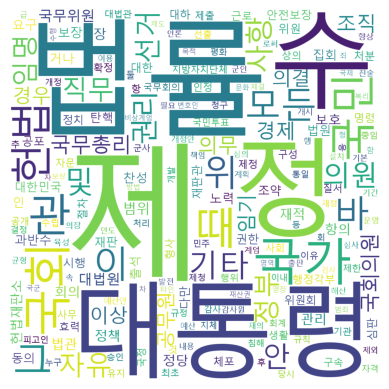

In [45]:
from wordcloud import WordCloud
font_path='c:/Windows/Fonts/malgun.ttf'
wc = WordCloud(width=1000, height=1000, background_color='white', font_path=font_path)
plt.imshow(wc.generate_from_frequencies(kolaw.vocab()))
plt.axis('off')
plt.show()

In [46]:
kv = kolaw.vocab()
kv2=dict()
for tag, count in kv.items():
    if (len(tag))>1:
        kv2[tag]=count
kv2

{'대한민국': 11,
 '헌법': 53,
 '유구': 1,
 '역사': 1,
 '전통': 1,
 '우리': 3,
 '국민': 61,
 '운동': 2,
 '건립': 1,
 '임시정부': 1,
 '통과': 1,
 '불의': 2,
 '항거': 1,
 '민주': 6,
 '이념': 1,
 '계승': 2,
 '조국': 3,
 '개혁': 1,
 '평화': 6,
 '통일': 6,
 '사명': 2,
 '각하': 1,
 '정의': 1,
 '인도': 1,
 '동포': 1,
 '로써': 5,
 '민족': 3,
 '단결': 1,
 '공고': 3,
 '모든': 37,
 '사회': 8,
 '폐습': 1,
 '타파': 1,
 '자율': 2,
 '조화': 2,
 '바탕': 1,
 '자유민주': 2,
 '질서': 8,
 '더욱': 1,
 '정치': 9,
 '경제': 18,
 '문화': 4,
 '영역': 4,
 '각인': 1,
 '기회': 3,
 '능력': 3,
 '최고': 2,
 '도로': 1,
 '발휘': 1,
 '자유': 20,
 '권리': 21,
 '책임': 5,
 '의무': 18,
 '완수': 1,
 '생활': 8,
 '향상': 5,
 '기하': 1,
 '항구': 1,
 '세계': 1,
 '인류': 1,
 '공영': 1,
 '이바지': 1,
 '자손': 1,
 '안전': 1,
 '행복': 2,
 '확보': 1,
 '다짐': 1,
 '제정': 8,
 '개정': 6,
 '이제': 1,
 '국회': 68,
 '의결': 17,
 '국민투표': 7,
 '민주공화국': 1,
 '주권': 2,
 '권력': 1,
 '요건': 1,
 '법률': 127,
 '국가': 73,
 '재외국민': 1,
 '보호': 14,
 '영토': 2,
 '한반도': 1,
 '부속': 1,
 '도서': 1,
 '지향': 1,
 '입각': 1,
 '정책': 14,
 '수립': 7,
 '추진': 1,
 '국제': 4,
 '유지': 7,
 '노력': 13,
 '침략': 1,
 '전쟁': 1,
 '부인': 1,
 '국군': 4,

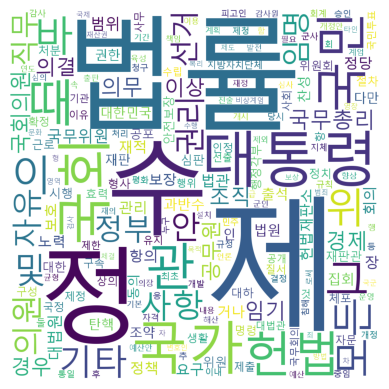

In [47]:
from wordcloud import WordCloud
font_path='c:/Windows/Fonts/malgun.ttf'
wc = WordCloud(width=1000, height=1000, background_color='white', font_path=font_path)
plt.imshow(wc.generate_from_frequencies(kolaw.vocab()))
plt.axis('off')
plt.show()

In [48]:
from collections import Counter

In [49]:
nouns = okt.nouns(c)
counter=Counter(nouns)
counter1 = counter.most_common(10)
counter1

[('제', 175),
 ('법률', 127),
 ('정', 89),
 ('수', 88),
 ('대통령', 83),
 ('국가', 73),
 ('국회', 68),
 ('국민', 61),
 ('관', 58),
 ('때', 55)]

In [50]:
counter2 = dict()
for tag, count in counter.items():
    if(len(tag)>1) and (count>1):
        counter2[tag]=count

counter2

{'대한민국': 11,
 '헌법': 53,
 '우리': 3,
 '국민': 61,
 '운동': 2,
 '불의': 2,
 '민주': 6,
 '계승': 2,
 '조국': 3,
 '평화': 6,
 '통일': 6,
 '사명': 2,
 '로써': 5,
 '민족': 3,
 '공고': 3,
 '모든': 37,
 '사회': 8,
 '자율': 2,
 '조화': 2,
 '자유민주': 2,
 '질서': 8,
 '정치': 9,
 '경제': 18,
 '문화': 4,
 '영역': 4,
 '기회': 3,
 '능력': 3,
 '최고': 2,
 '자유': 20,
 '권리': 21,
 '책임': 5,
 '의무': 18,
 '생활': 8,
 '향상': 5,
 '행복': 2,
 '제정': 8,
 '개정': 6,
 '국회': 68,
 '의결': 17,
 '국민투표': 7,
 '주권': 2,
 '법률': 127,
 '국가': 73,
 '보호': 14,
 '영토': 2,
 '정책': 14,
 '수립': 7,
 '국제': 4,
 '유지': 7,
 '노력': 13,
 '국군': 4,
 '안전보장': 10,
 '국토': 3,
 '수행': 4,
 '중립성': 3,
 '준수': 2,
 '체결': 4,
 '공포': 10,
 '조약': 11,
 '일반': 2,
 '승인': 6,
 '효력': 9,
 '지위': 3,
 '보장': 13,
 '공무원': 17,
 '대한': 10,
 '대하': 9,
 '신분': 3,
 '정당': 14,
 '목적': 4,
 '조직': 18,
 '활동': 3,
 '의사': 2,
 '운영': 5,
 '위배': 2,
 '정부': 20,
 '헌법재판소': 14,
 '해산': 5,
 '제소': 3,
 '심판': 10,
 '발전': 5,
 '창달': 2,
 '인간': 3,
 '존엄': 2,
 '가지': 2,
 '개인': 3,
 '기본': 5,
 '누구': 6,
 '종교': 3,
 '차별': 2,
 '제도': 4,
 '인정': 8,
 '훈장': 2,
 '영전': 3,
 '신체': 3,
 '체포': 9,


In [51]:
sentence = '★우리은행 또 횡령 사건… 9000만 원 빼돌려 코인 투자 + \
우리은행 전북 지역 지점 직원이 5월 중순부터 6월 초까지 외환거래 환차익 7만 달러(약 9000만 원)를 빼돌린 사실이 자체 검사 결과 드러났다. 이 직원은 가상자산 투자를 목적으로 돈을 횡령한 것으로 알려졌다. 우리은행 측은 “6월 초 해당 직원의 의심스러운 거래를 발견하고 검사에 착수해 횡령 사실을 확인했다”면서 “적발된 직원에 대한 면직 및 형사고발과 함께 관리를 소홀히 한 지점장 등 관리자도 징계할 것”이라고 밝혔다. 지난해에는 우리은행 본점 직원이 700억 원 규모의 횡령을 저지른 사건이 있었다. + \
미래에셋그룹이 일감 몰아주기 혐의로 공정거래위원회(공정위)로부터 약 44억 원 과징금 처분을 받은 가운데 해당 처분이 적법하다는 법원 판결이 나왔다. 서울고법은 7월 5일 미래에셋 8개 계열사 등이 제기한 시정명령 및 과징금납부명령 취소 청구소송에서 원고 패소 판결을 내렸다. 앞서 공정위는 “2020년 미래에셋 계열사들이 미래에셋컨설팅이 운영하는 골프장, 호텔과 거래해 박현주 미래에셋 회장 등 특수관계인들에게 부당한 이익을 귀속시켰다”며 시정명령과 함께 과징금 43억9100만 원을 부과한 바 있다. + \
LG화학이 20억 달러(약 2조6000억 원) 규모의 외화 교환사채(EB)를 발행한다. LG화학은 확보한 자금을 전지 소재, 신약 개발 등 미래 성장 기반 확충을 위한 시설 투자와 운영 자금에 사용할 계획이라고 7월 1일 밝혔다. 교환 대상은 LG에너지솔루션 보통주로 교환 가격은 7월 11일 LG에너지솔루션 종가 55만 원이다. + \
넥슨이 새롭게 출시한 게임 ‘데이브 더 다이버’(데이브)가 흥행 돌풍을 일으키고 있다. 데이브는 6월 28일 글로벌 동시 출시 이후 하루 만에 세계 최대 PC게임 유통 플랫폼 스팀에서 유가게임 판매량 1위를 기록했다. 7월 8일에는 글로벌 누적 판매량 100만 장을 돌파했다. 데이브는 낮에는 바다에서 해양생물을 사냥하고, 밤에는 포획한 해양생물로 초밥집을 운영하는 하이브리드 해양 어드벤처 게임이다.  + \
유한양행이 연간 7000만 원이 넘는 폐암 환자의 약값 부담을 덜어주기로 했다. 폐암 1차 치료제로 허가받은 유한양행 렉자라를 이르면 내년 초 건강보험급여가 적용될 때까지 환자들에게 무상 공급하겠다는 것이다. 유한양행은 2·3차 의료기관의 신청을 받아 일련의 심사를 거친 뒤 1차 치료 대상에게 환자 수 제한 없이 렉자라를 무상 지원한다. 국내 신약 중 건강보험급여 등재 전 무제한으로 의약품을 무상 지원하는 건 이번이 처음이다.'

In [52]:
nouns_news = okt.nouns(sentence)
counter = Counter(nouns_news)
counter2 = dict()
for tag, count in counter.items():
    if(len(tag)>1) and (count>1):
        counter2[tag] = count
counter2

{'우리은행': 4,
 '횡령': 4,
 '사건': 2,
 '투자': 3,
 '지점': 2,
 '직원': 5,
 '달러': 2,
 '사실': 2,
 '검사': 2,
 '해당': 2,
 '거래': 3,
 '규모': 2,
 '미래에셋': 5,
 '공정위': 2,
 '과징금': 3,
 '처분': 2,
 '판결': 2,
 '시정': 2,
 '명령': 3,
 '운영': 3,
 '화학': 2,
 '교환': 3,
 '자금': 2,
 '신약': 2,
 '대상': 2,
 '에너지': 2,
 '솔루션': 2,
 '출시': 2,
 '게임': 4,
 '데이브': 4,
 '글로벌': 2,
 '판매량': 2,
 '해양': 3,
 '생물': 2,
 '유한양행': 3,
 '폐암': 2,
 '환자': 3,
 '치료': 2,
 '자라': 2,
 '건강': 2,
 '보험': 2,
 '무상': 3,
 '지원': 2}

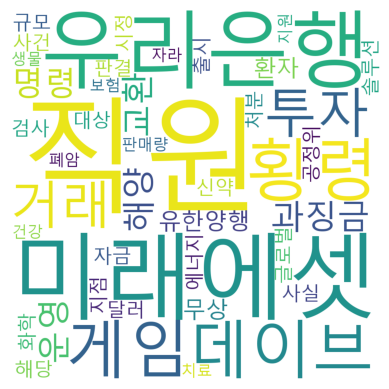

In [53]:
wc = WordCloud(width=1000, height=1000, background_color='white', random_state=0, font_path=font_path)
plt.imshow(wc.generate_from_frequencies(counter2))
plt.axis('off')
plt.show()

In [54]:
! pip install pygame
! pip install pytagcloud
! pip install simplejson

In [56]:
import pytagcloud
count3 = counter.most_common(50)
taglist = pytagcloud.make_tags(count3, maxsize=80)
pytagcloud.create_tag_image(taglist, 'data/우리은행.png', size=(900, 800), fontname='Korean', rectangular=False)